<h1>Projet Ecommerce

Olist souhaite que vous fournissiez à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

Votre objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.

Vous devrez fournir à l’équipe marketing une description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.

Pour cette mission, Olist vous fournit une base de données anonymisée comportant des informations sur l’historique de commandes, les produits achetés, les commentaires de satisfaction, et la localisation des clients depuis janvier 2017.

<h3>Votre Mission

Votre mission est d’aider les équipes d’Olist à comprendre les différents types d'utilisateurs. Vous utiliserez donc des méthodes non supervisées pour regrouper ensemble des clients de profils similaires. Ces catégories pourront être utilisées par l’équipe marketing pour mieux communiquer.

Enfin, votre client, Olist, a spécifié sa demande ainsi :

La segmentation proposée doit être exploitable et facile d’utilisation pour l’équipe marketing.
Vous évaluerez la fréquence à laquelle la segmentation doit être mise à jour, afin de pouvoir effectuer un devis de contrat de maintenance.
Le code fourni doit respecter la convention PEP8, pour être utilisable par Olist.

<h1> Chargement des données

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from random import sample
from folium.plugins import HeatMap
from EDA_utils import *
from matplotlib.gridspec import GridSpec
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', None)

In [22]:
filepath_1 = "/Users/efkanturedi/Corteze/my_py3/03_E_commerce/Input/olist_customers_dataset.csv"
filepath_2 = "/Users/efkanturedi/Corteze/my_py3/03_E_commerce/Input/olist_geolocation_dataset.csv"
filepath_3 = "/Users/efkanturedi/Corteze/my_py3/03_E_commerce/Input/olist_order_items_dataset.csv"
filepath_4 = "/Users/efkanturedi/Corteze/my_py3/03_E_commerce/Input/olist_order_payments_dataset.csv"
filepath_5 = "/Users/efkanturedi/Corteze/my_py3/03_E_commerce/Input/olist_order_reviews_dataset.csv"
filepath_6 = "/Users/efkanturedi/Corteze/my_py3/03_E_commerce/Input/olist_orders_dataset.csv"
filepath_7 = "/Users/efkanturedi/Corteze/my_py3/03_E_commerce/Input/olist_products_dataset.csv"
filepath_8 = "/Users/efkanturedi/Corteze/my_py3/03_E_commerce/Input/olist_sellers_dataset.csv"
filepath_9 = "/Users/efkanturedi/Corteze/my_py3/03_E_commerce/Input/product_category_name_translation.csv"


#filepath_1 = "/home/et/Mytest/my_py3/03_E_commerce/Input/olist_customers_dataset.csv"
#filepath_2 = "/home/et/Mytest/my_py3/03_E_commerce/Input/olist_geolocation_dataset.csv"
#filepath_3 = "/home/et/Mytest/my_py3/03_E_commerce/Input/olist_order_items_dataset.csv"
#filepath_4 = "/home/et/Mytest/my_py3/03_E_commerce/Input/olist_order_payments_dataset.csv"
#filepath_5 = "/home/et/Mytest/my_py3/03_E_commerce/Input/olist_order_reviews_dataset.csv"
#filepath_6 = "/home/et/Mytest/my_py3/03_E_commerce/Input/olist_orders_dataset.csv"
#filepath_7 = "/home/et/Mytest/my_py3/03_E_commerce/Input/olist_products_dataset.csv"
#filepath_8 = "/home/et/Mytest/my_py3/03_E_commerce/Input/olist_sellers_dataset.csv"
#filepath_9 = "/home/et/Mytest/my_py3/03_E_commerce/Input/product_category_name_translation.csv"



In [23]:
customers = pd.read_csv(filepath_1);
geolocation = pd.read_csv(filepath_2)
order_items = pd.read_csv(filepath_3);
order_payments = pd.read_csv(filepath_4)
order_reviews = pd.read_csv(filepath_5)
orders = pd.read_csv(filepath_6)
products = pd.read_csv(filepath_7)
sellers = pd.read_csv(filepath_8)
product_category_name_translation = pd.read_csv(filepath_9)

In [24]:
customersX = customers.copy(deep=True);
geolocationX = geolocation.copy(deep=True)
order_itemsX = order_items.copy(deep=True)
order_paymentsX = order_payments.copy(deep=True)
order_reviewsX = order_reviews.copy(deep=True)
ordersX = orders.copy(deep=True)
productsX = products.copy(deep=True)
sellersX = sellers.copy(deep=True)
product_category_name_translationX = product_category_name_translation.copy(deep=True)

In [25]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [26]:
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [27]:
len(geolocation[['geolocation_lng','geolocation_lat']])

1000163

In [28]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [29]:
order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [30]:
order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


In [31]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [32]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [33]:
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [34]:
product_category_name_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


Mettons nos données dans une liste afin de pouvoir faire des loop par dessus

In [35]:
liste_db = [
  customersX,
  geolocationX,
  order_itemsX,
  order_paymentsX,
  order_reviewsX,
  ordersX,
  productsX,
  sellersX,
  product_category_name_translationX
]

<h1>Les données Manquantes

Regardons le nombre de NaNs dans nos fichiers CSV

In [36]:
for item in liste_db:
  print(item.isna().sum().sum())

0
0
0
0
146532
4908
2448
0
0


3 de nos fichiers ont des NaNs: *order_reviews*, *orders* et *products*

Regardons plus attentivement les sources de ces données manquantes dans chacuns de ces fichiers

In [37]:
order_reviewsX.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [38]:
ordersX.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [39]:
productsX.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

<h1>Les données dupliquées

In [40]:
for item in liste_db:
  print(item.duplicated().sum())

0
261831
0
0
0
0
0
0
0


In [41]:
geolocationX[geolocationX.duplicated()].sample(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
143102,5760,-23.633075,-46.764478,sao paulo,SP
532526,29102,-20.356452,-40.294285,vila velha,ES
390490,18550,-23.300858,-47.649677,boituva,SP
786962,71918,-15.837192,-48.032246,brasília,DF
813017,76868,-9.431195,-62.003044,machadinho d'oeste,RO
420908,20950,-22.902324,-43.257592,rio de janeiro,RJ
138242,5663,-23.609509,-46.729366,sao paulo,SP
115903,5065,-23.520538,-46.695132,sao paulo,SP
414890,20511,-22.934000,-43.243291,rio de janeiro,RJ
379733,18040,-23.506751,-47.470592,sorocaba,SP


Pas de quoi s'inquiéter sur ce côté là

<h1>Types des données

In [42]:
df_titles = [
  'customers',
  'geolocation',
  'order_items',
  'order_payments',
  'order_reviews',
  'orders',
  'products',
  'sellers',
  'product_category_name_translation'
]

In [43]:
idxes = []
cols = []
types = []
uniques = []
counter=0
for df in liste_db:
    for col in df.columns:
        idxes.append(df_titles[counter])
        cols.append(col)
        types.append(df[col].dtype)
        uniques.append(df[col].nunique())
    counter+=1
full_data_labels = pd.DataFrame([idxes, 
                            cols, 
                            types, 
                            uniques]
                          ).T
full_data_labels.columns=['Indexes', 'Columns', 'Types', 'Unique vals']
full_data_labels

,Indexes,Columns,Types,Unique vals
0,customers,customer_id,object,99441
1,customers,customer_unique_id,object,96096
2,customers,customer_zip_code_prefix,int64,14994
3,customers,customer_city,object,4119
4,customers,customer_state,object,27
5,geolocation,geolocation_zip_code_prefix,int64,19015
6,geolocation,geolocation_lat,float64,717360
7,geolocation,geolocation_lng,float64,717613
8,geolocation,geolocation_city,object,8011
9,geolocation,geolocation_state,object,27


<h1>Fonctions utils pour nettoyage

In [44]:
ordersX['order_approved_at'].fillna(-1, inplace=True)
ordersX['order_delivered_carrier_date'].fillna(0, inplace=True)
ordersX['order_delivered_customer_date'].fillna(0, inplace=True)

In [45]:
ordersX.duplicated().sum()

0

In [46]:
geolocationX.drop_duplicates(inplace=True)
geolocationX['customer_zip_code_prefix'] = geolocationX['geolocation_zip_code_prefix']

In [47]:
order_reviewsX['review_comment_title'].fillna('None',inplace=True)
order_reviewsX['review_comment_message'].fillna('None',inplace=True)

In [48]:
productsX['product_category_name'].fillna('Unknown',inplace=True)
productsX['product_name_lenght'].fillna(0, inplace=True)
productsX['product_description_lenght'].fillna(0,inplace=True)
productsX['product_photos_qty'].fillna(0, inplace=True)
productsX['product_weight_g'].fillna(0, inplace=True)
productsX['product_length_cm'].fillna(0, inplace=True)
productsX['product_height_cm'].fillna(0, inplace=True)
productsX['product_width_cm'].fillna(0, inplace=True)

In [49]:
order_itemsX['shipping_limit_date'] = order_itemsX['shipping_limit_date'].astype('datetime64')
ordersX['order_purchase_timestamp'] = ordersX['order_purchase_timestamp'].astype('datetime64')
ordersX['order_approved_at'] = pd.to_datetime(ordersX['order_approved_at'], errors='coerce')
ordersX['order_delivered_carrier_date'] = pd.to_datetime(ordersX['order_delivered_carrier_date'], errors='coerce')
ordersX['order_delivered_customer_date'] = pd.to_datetime(ordersX['order_delivered_customer_date'], errors='coerce')
ordersX['order_estimated_delivery_date'] = ordersX['order_estimated_delivery_date'].astype('datetime64')

In [50]:
products_local = pd.merge(productsX, product_category_name_translationX).drop(['product_category_name'], axis=1)

In [51]:
for item in liste_db:
  print(item.isna().sum().sum())

0
0
0
0
0
0
0
0
0


<h1>Creation d'un fichier master

On va essayer de résoudre notre problème de jointure via Pandas. L'idée est de créer une grande base de données utilisable.

In [52]:
master_df = ordersX.merge(order_itemsX,on='order_id',how='left')
master_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [53]:
master_df.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
order_item_id                    775
product_id                       775
seller_id                        775
shipping_limit_date              775
price                            775
freight_value                    775
dtype: int64

In [54]:
master_df = order_paymentsX.merge(master_df,on='order_id',how='left')
master_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,1.0,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13,1.0,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,2018-05-31 16:14:41,113.57,14.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118426,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04,1.0,1302fd16bdfe85e523940c846370ef2c,a369d693961cb93b61ca2cc518872a85,2018-03-15 03:55:25,297.00,66.31
118427,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12,1.0,fb55982be901439613a95940feefd9ee,3d871de0142ce09b7081e2b9d1733cb1,2017-08-24 10:04:56,79.00,17.80
118428,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,1970-01-01 00:00:00,1970-01-01 00:00:00,2017-12-05,1.0,848ef0a103ee21407d1fbd0f7e7ae179,3d621842b2ed28e2b474132480edac3c,2017-11-27 17:46:05,39.99,7.78
118429,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,delivered,2018-08-07 23:26:13,2018-08-07 23:45:00,2018-08-09 11:46:00,2018-08-21 22:41:46,2018-08-24,1.0,e9c1abcc7126360336d8f56d49041a8c,679769a98cfcc6da877c8486ff1c13f3,2018-08-13 23:45:00,349.00,20.54


In [55]:
master_df.isna().sum()

order_id                           0
payment_sequential                 0
payment_type                       0
payment_installments               0
payment_value                      0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
order_item_id                    830
product_id                       830
seller_id                        830
shipping_limit_date              830
price                            830
freight_value                    830
dtype: int64

In [56]:
master_df = master_df.merge(order_reviewsX, on='order_id',how='left')
master_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,1.0,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,ad2036caca61484fc435d7e673c020f2,5,None,None,2018-06-30 00:00:00,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,bcddfa0f7d2e54cfc74bae4f01b84d92,5,None,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,c37a0e51e5df82bdb55d38ff0ffb6af3,5,None,None,2017-12-21 00:00:00,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,5bc7680443b4ef765fec11a8201eeb0c,5,None,None,2017-12-21 00:00:00,2017-12-22 01:10:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119143,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04,1.0,1302fd16bdfe85e523940c846370ef2c,a369d693961cb93b61ca2cc518872a85,2018-03-15 03:55:25,297.00,66.31,9f402e937d15b4664948410079ab687d,5,None,Tudo certo!,2018-03-17 00:00:00,2018-03-20 15:17:08
119144,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12,1.0,fb55982be901439613a95940feefd9ee,3d871de0142ce09b7081e2b9d1733cb1,2017-08-24 10:04:56,79.00,17.80,f78d2909c6c202d3cabb8bac3fc00e75,5,None,None,2017-08-24 00:00:00,2017-08-25 19:38:31
119145,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,1970-01-01 00:00:00,1970-01-01 00:00:00,2017-12-05,1.0,848ef0a103ee21407d1fbd0f7e7ae179,3d621842b2ed28e2b474132480edac3c,2017-11-27 17:46:05,39.99,7.78,2cdb88f8dce688bb85e20a5cf069e589,1,None,None,2017-12-07 00:00:00,2017-12-07 09:00:59
119146,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,delivered,2018-08-07 23:26:13,2018-08-07 23:45:00,2018-08-09 11:46:00,2018-08-21 22:41:46,2018-08-24,1.0,e9c1abcc7126360336d8f56d49041a8c,679769a98cfcc6da877c8486ff1c13f3,2018-08-13 23:45:00,349.00,20.54,6c698e5d193ab18db7615ea75a28866e,5,None,None,2018-08-22 00:00:00,2018-08-23 15

In [57]:
master_df = master_df.merge(customersX, on='customer_id',how='left')
master_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,1.0,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,ad2036caca61484fc435d7e673c020f2,5,None,None,2018-06-30 00:00:00,2018-07-03 11:23:16,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,bcddfa0f7d2e54cfc74bae4f01b84d92,5,None,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,c37a0e51e5df82bdb55d38ff0ffb6af3,5,None,None,2017-12-21 00:00:00,2017-12-21 21:42:31,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,5bc7680443b4ef765fec11a8201eeb0c,5,None,None,2017-12-21 00:00:00,2017-12-22 01:10:39,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119143,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04,1.0,1302fd16bdfe85e523940c846370ef2c,a369d693961cb93b61ca2cc518872a85,2018-03-15 03:55:25,297.00,66.31,9f402e937d15b4664948410079ab687d,5,None,Tudo certo!,2018-03-17 00:00:00,2018-03-20 15:17:08,b6027ac07fb76ebca8c97b1887865aee,12954,atibaia,SP
119144,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12,1.0,fb55982be901439613a95940feefd9ee,3d871de0142ce09b7081e2b9d1733cb1,2017-08-24 10:04:56,79.00,17.80,f78d2909c6c202d3cabb8bac3fc00e75,5,None,None,2017-08-24 00:00:00,2017-08-25 19:38:31,53b30ca78efb2b7efcd3f9e461587eb2,30210,belo horizonte,MG
119145,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,1970-01-01 00:00:00,1970-01-01 00:00:00,2017-12-05,1.0,848ef0a103ee21407d1fbd0f7e7ae179,3d621842b2ed28e2b474132480edac3c,2017-11-27 17:46:05,39.99,7.78

In [58]:
#temp = temp.set_index('product_id').join(productsX.set_index('product_id'))


master_df = master_df.merge(productsX,on='product_id',how='left')
master_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,casa_construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,1.0,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,ad2036caca61484fc435d7e673c020f2,5,None,None,2018-06-30 00:00:00,2018-07-03 11:23:16,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,automotivo,59.0,1274.0,2.0,150.0,16.0,6.0,11.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,bcddfa0f7d2e54cfc74bae4f01b84d92,5,None,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,perfumaria,54.0,1536.0,2.0,250.0,20.0,8.0,21.0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,c37a0e51e5df82bdb55d38ff0ffb6af3,5,None,None,2017-12-21 00:00:00,2017-12-21 21:42:31,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,cama_mesa_banho,60.0,188.0,1.0,1200.0,44.0,2.0,35.0
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,5bc7680443b4ef765fec11a8201eeb0c,5,None,None,2017-12-21 00:00:00,2017-12-22 01:10:39,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,cama_mesa_banho,60.0,188.0,1.0,1200.0,44.0,2.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119143,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04,1.0,1302fd16bdfe85e523940c846370ef2c,a369d693961cb93b61ca2cc518872a85,2018-03-15 03:55:25,297.00,66.31,9f402e937d15b4664948410079ab687d,5,None,Tudo certo!,2018-03-17 00:00:00,2018-03-20 15:17:08,b6027ac07fb76ebca8c97b1887865aee,12954,atibaia,SP,construcao_ferramentas_iluminacao,31.0,309.0,1.0,13450.0,95.0,30.0,20.0
119144,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12,1.0,fb55982be901439613a9594

In [59]:
#temp = temp.set_index('seller_id').join(sellersX.set_index('seller_id'))


master_df = master_df.merge(sellersX,on='seller_id',how='left')
master_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,casa_construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0,13321.0,salto,SP
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,1.0,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,ad2036caca61484fc435d7e673c020f2,5,None,None,2018-06-30 00:00:00,2018-07-03 11:23:16,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,automotivo,59.0,1274.0,2.0,150.0,16.0,6.0,11.0,4660.0,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,bcddfa0f7d2e54cfc74bae4f01b84d92,5,None,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,perfumaria,54.0,1536.0,2.0,250.0,20.0,8.0,21.0,9015.0,santo andre,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,c37a0e51e5df82bdb55d38ff0ffb6af3,5,None,None,2017-12-21 00:00:00,2017-12-21 21:42:31,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,cama_mesa_banho,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,13405.0,piracicaba,SP
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,5bc7680443b4ef765fec11a8201eeb0c,5,None,None,2017-12-21 00:00:00,2017-12-22 01:10:39,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,cama_mesa_banho,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,13405.0,piracicaba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119143,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04,1.0,1302fd16bdfe85e523940c846370ef2c,a369d693961cb93b61ca2cc518872a85,2018-03-15 03:55:25,297.00,66.31,9f402e937d15b4664948410079ab687d,5,None,Tudo certo!,2018-03-17 00:00:00,2018-03-20 15:17:08,b6027ac07fb76ebca8c97b1887865aee,12954,atibaia,SP,construcao_ferramentas_iluminacao,31.0,309.0,1.0,13450.0,95.0,30.0,20.0,15081.0,sao jose do rio preto,SP
119144,7b905861d7c825891d63

In [60]:
original_names = list(product_category_name_translationX['product_category_name'])
replacer = list(product_category_name_translationX['product_category_name_english'])

master_df['product_category_name'].replace(original_names,replacer,inplace=True)

In [61]:
master_df = master_df.dropna()

In [62]:
master_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,home_construction,57.0,921.0,8.0,800.0,17.0,27.0,17.0,13321.0,salto,SP
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,1.0,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,ad2036caca61484fc435d7e673c020f2,5,None,None,2018-06-30 00:00:00,2018-07-03 11:23:16,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,auto,59.0,1274.0,2.0,150.0,16.0,6.0,11.0,4660.0,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,bcddfa0f7d2e54cfc74bae4f01b84d92,5,None,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,perfumery,54.0,1536.0,2.0,250.0,20.0,8.0,21.0,9015.0,santo andre,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,c37a0e51e5df82bdb55d38ff0ffb6af3,5,None,None,2017-12-21 00:00:00,2017-12-21 21:42:31,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,bed_bath_table,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,13405.0,piracicaba,SP
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,5bc7680443b4ef765fec11a8201eeb0c,5,None,None,2017-12-21 00:00:00,2017-12-22 01:10:39,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,bed_bath_table,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,13405.0,piracicaba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119143,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04,1.0,1302fd16bdfe85e523940c846370ef2c,a369d693961cb93b61ca2cc518872a85,2018-03-15 03:55:25,297.00,66.31,9f402e937d15b4664948410079ab687d,5,None,Tudo certo!,2018-03-17 00:00:00,2018-03-20 15:17:08,b6027ac07fb76ebca8c97b1887865aee,12954,atibaia,SP,construction_tools_lights,31.0,309.0,1.0,13450.0,95.0,30.0,20.0,15081.0,sao jose do rio preto,SP
119144,7b905861d7c825891d6347454ea7863f,1,

In [63]:
master_df['product_category_name'].unique()

array(['home_construction', 'auto', 'perfumery', 'bed_bath_table',
       'housewares', 'art', 'sports_leisure', 'furniture_living_room',
       'garden_tools', 'electronics', 'signaling_and_security',
       'cool_stuff', 'watches_gifts', 'baby', 'furniture_decor',
       'construction_tools_lights', 'pet_shop', 'health_beauty',
       'office_furniture', 'consoles_games', 'home_appliances',
       'telephony', 'toys', 'stationery', 'books_general_interest',
       'computers_accessories', 'small_appliances',
       'fashion_bags_accessories', 'costruction_tools_garden',
       'musical_instruments', 'christmas_supplies', 'Unknown',
       'luggage_accessories', 'construction_tools_construction',
       'costruction_tools_tools', 'market_place', 'food_drink',
       'home_confort', 'fixed_telephony', 'audio', 'air_conditioning',
       'home_appliances_2', 'fashion_sport',
       'kitchen_dining_laundry_garden_furniture',
       'construction_tools_safety', 'food',
       'industry_co

In [64]:
master_df['product_category_name'].replace(['Unknown','portateis_cozinha_e_preparadores_de_alimentos'],'Other',inplace=True)


In [65]:
master_df['product_category_name'].unique()

array(['home_construction', 'auto', 'perfumery', 'bed_bath_table',
       'housewares', 'art', 'sports_leisure', 'furniture_living_room',
       'garden_tools', 'electronics', 'signaling_and_security',
       'cool_stuff', 'watches_gifts', 'baby', 'furniture_decor',
       'construction_tools_lights', 'pet_shop', 'health_beauty',
       'office_furniture', 'consoles_games', 'home_appliances',
       'telephony', 'toys', 'stationery', 'books_general_interest',
       'computers_accessories', 'small_appliances',
       'fashion_bags_accessories', 'costruction_tools_garden',
       'musical_instruments', 'christmas_supplies', 'Other',
       'luggage_accessories', 'construction_tools_construction',
       'costruction_tools_tools', 'market_place', 'food_drink',
       'home_confort', 'fixed_telephony', 'audio', 'air_conditioning',
       'home_appliances_2', 'fashion_sport',
       'kitchen_dining_laundry_garden_furniture',
       'construction_tools_safety', 'food',
       'industry_comm

In [66]:
dict_categories = {
#home
'furniture_living_room' : 'Home',
'furniture_mattress_and_upholstery' : 'Home',
'furniture_bedroom' : 'Home',
'furniture_decor' : 'Home',
'bed_bath_table' : 'Home',
'kitchen_dining_laundry_garden_furniture' : 'Home',
'la_cuisine' : 'Home',
'home_confort' : 'Home',
'home_comfort_2' : 'Home',
'christmas_supplies' : 'Home',
    
#appliances
'small_appliances' : 'Appliances',
'small_appliances_home_oven_and_coffee' : 'Appliances',
'home_appliances_2' : 'Appliances',
'home_appliances' : 'Appliances',
'housewares' : 'Appliances',
    
#construction
'construction_tools_construction': 'Construction',
'costruction_tools_garden': 'Construction',
'costruction_tools_tools': 'Construction',
'construction_tools_safety': 'Construction',
'construction_tools_lights': 'Construction',
'home_construction': 'Construction',
'air_conditioning': 'Construction',
    
#office
'office_furniture' : 'Office',
'industry_commerce_and_business' : 'Office',
'stationery' : 'Office',
'agro_industry_and_commerce' : 'Office',
'signaling_and_security' : 'Office',
'furnitures' : 'Office',
'security_and_services' : 'Office',

#electronics
'telephony' : 'Electronics',
'electronics': 'Electronics',
'computers_accessories': 'Electronics',
'consoles_games': 'Electronics',
'fixed_telephony': 'Electronics',
'audio': 'Electronics',
'computers': 'Electronics',
'tablets_printing_image': 'Electronics',

#sports_leisure
'sports_leisure' : 'Sports_leisure',
'musical_instruments': 'Sports_leisure',
'party_supplies': 'Sports_leisure',
'luggage_accessories': 'Sports_leisure',

#arts
'books' : 'Arts',
'books_imported': 'Arts',
'books_general_interest': 'Arts',
'books_technical': 'Arts',
'art': 'Arts',
'toys': 'Arts',
'cine_photo': 'Arts',
'cds_dvds_musicals': 'Arts',
'music': 'Arts',
'dvds_blu_ray': 'Arts',
'arts_and_craftmanship': 'Arts',

#fashion
'watches_gifts' : 'Fashion',
'fashion_bags_accessories' : 'Fashion',
'fashion_underwear_beach' : 'Fashion',
'fashion_shoes' : 'Fashion', 
'fashion_male_clothing' : 'Fashion',
'fashio_female_clothing' : 'Fashion',
'fashion_sport' : 'Fashion',
'fashion_childrens_clothes' : 'Fashion',

#health_beauty
'health_beauty' : 'Health_beauty', 
'baby': 'Health_beauty',
'diapers_and_hygiene' : 'Health_beauty',
'perfumery' : 'Health_beauty',

#garden and pets
'flowers' : 'Garden_pets',
'pet_shop' : 'Garden_pets',
'garden_tools' : 'Garden_pets',

#auto
'auto' : 'Auto',

#food_drinks
'food_drink' : 'Food_drinks',
'food' : 'Food_drinks',
'drinks' : 'Food_drinks',

#other
'Unknown' : 'Other',
'market_place' : 'Other',
'Other':'Other',
'cool_stuff' : 'Other'
}

In [67]:
master_df['product_category_name'] = master_df['product_category_name'].map(dict_categories)

<h1>Analyse Exploratoire

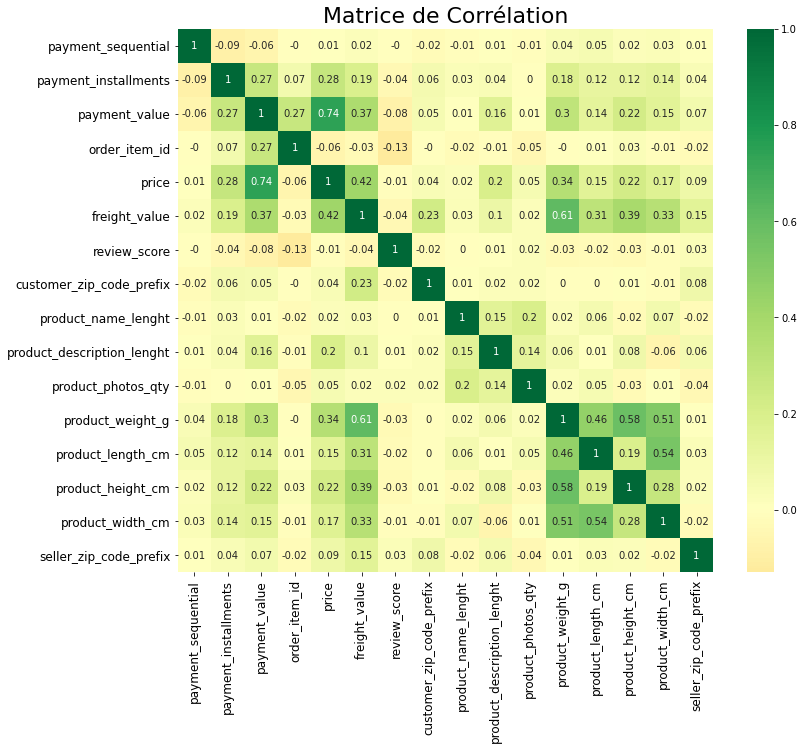

In [68]:
plt.figure(figsize=(12,10))
sns.heatmap(master_df.corr().round(2), 
            xticklabels=master_df.corr().columns, 
            yticklabels=master_df.corr().columns, 
            cmap='RdYlGn', center=0, annot=True)

plt.title('Matrice de Corrélation', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

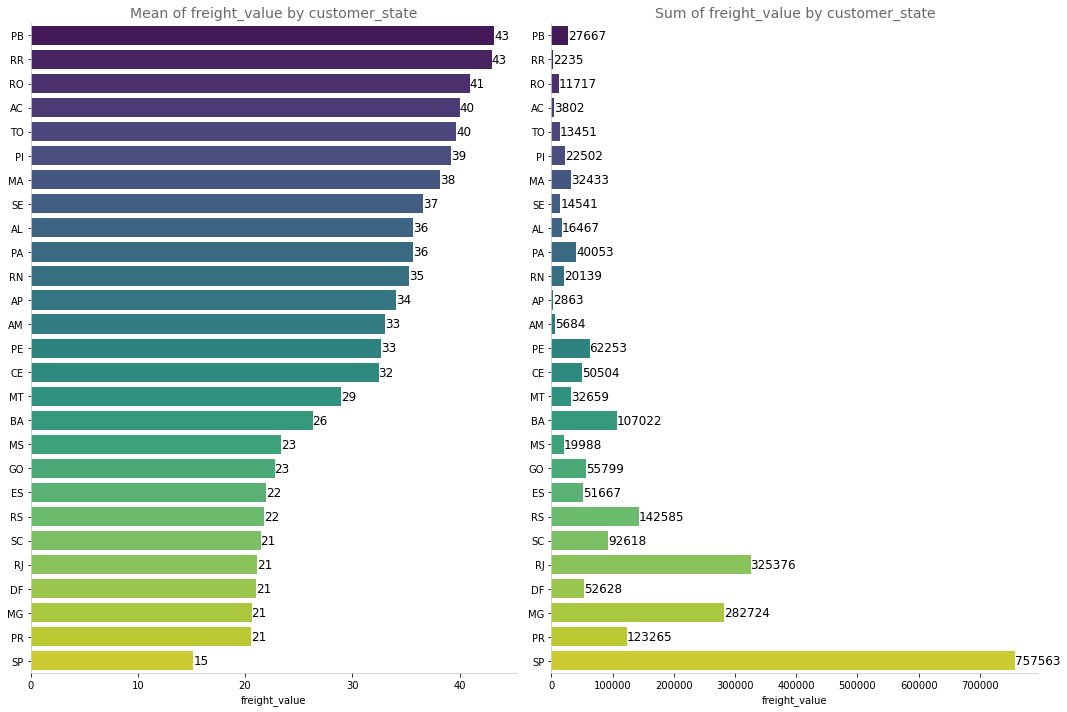

In [69]:
mean_sum_analysis(master_df, 'customer_state', 'freight_value', palette='viridis', figsize=(15, 10))

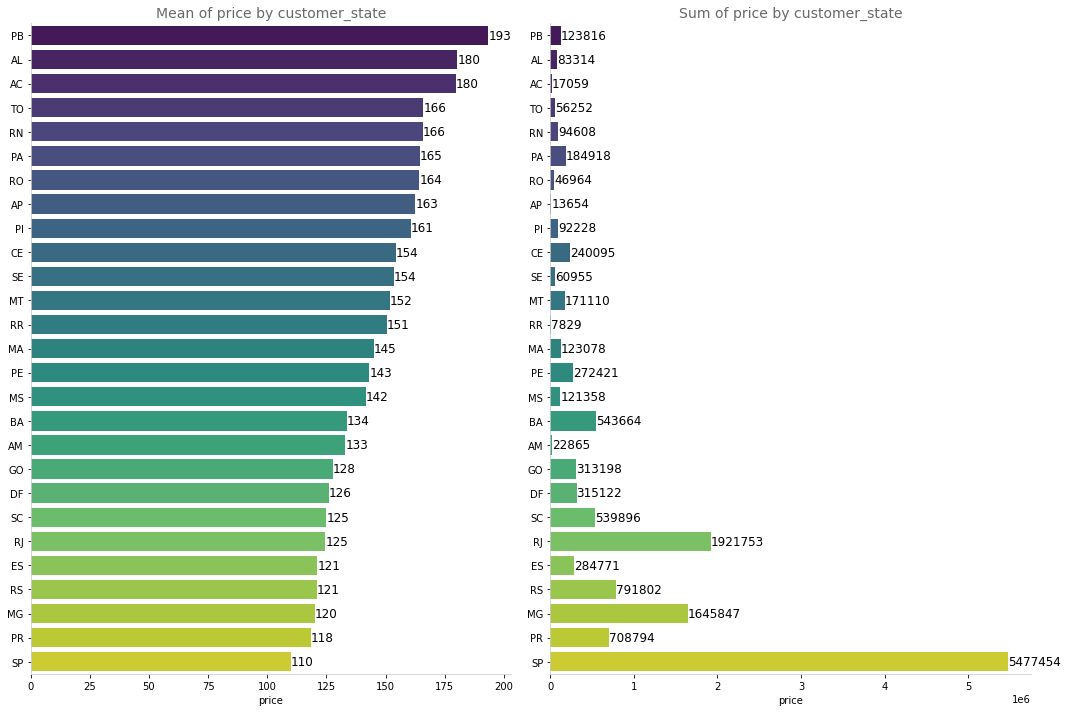

In [70]:
mean_sum_analysis(master_df, 'customer_state', 'price', palette='viridis', figsize=(15, 10))

In [71]:
# Changing the data type for date columns
timestamp_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                  'order_estimated_delivery_date']
for col in timestamp_cols:
    master_df[col] = pd.to_datetime(master_df[col])
    
# Extracting attributes for purchase date - Year and Month
master_df['order_purchase_year'] = master_df['order_purchase_timestamp'].apply(lambda x: x.year)
master_df['order_purchase_month'] = master_df['order_purchase_timestamp'].apply(lambda x: x.month)
master_df['order_purchase_month_name'] = master_df['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
master_df['order_purchase_year_month'] = master_df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
master_df['order_purchase_date'] = master_df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))

# Extracting attributes for purchase date - Day and Day of Week
master_df['order_purchase_day'] = master_df['order_purchase_timestamp'].apply(lambda x: x.day)
master_df['order_purchase_dayofweek'] = master_df['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
master_df['order_purchase_dayofweek_name'] = master_df['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

# Extracting attributes for purchase date - Hour and Time of the Day
master_df['order_purchase_hour'] = master_df['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
master_df['order_purchase_time_day'] = pd.cut(master_df['order_purchase_hour'], hours_bins, labels=hours_labels)

# New DataFrame after transformations
master_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,Construction,57.0,921.0,8.0,800.0,17.0,27.0,17.0,13321.0,salto,SP,2018,4,Apr,201804,20180425,25,2,Wed,22,Night
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,1.0,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,ad2036caca61484fc435d7e673c020f2,5,None,None,2018-06-30 00:00:00,2018-07-03 11:23:16,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,Auto,59.0,1274.0,2.0,150.0,16.0,6.0,11.0,4660.0,sao paulo,SP,2018,6,Jun,201806,20180626,26,1,Tue,11,Morning
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,bcddfa0f7d2e54cfc74bae4f01b84d92,5,None,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,Health_beauty,54.0,1536.0,2.0,250.0,20.0,8.0,21.0,9015.0,santo andre,SP,2017,12,Dec,201712,20171212,12,1,Tue,11,Morning
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,c37a0e51e5df82bdb55d38ff0ffb6af3,5,None,None,2017-12-21 00:00:00,2017-12-21 21:42:31,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,Home,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,13405.0,piracicaba,SP,2017,12,Dec,201712,20171206,6,2,Wed,12,Morning
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,5bc7680443b4ef765fec11a8201eeb0c,5,None,None,2017-12-21 00:00:00,2017-12-22 01:10:39,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,Home,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,13405.0,piracicaba,SP,2017,12,Dec,201712,20171206,6,2,Wed,12,Morning


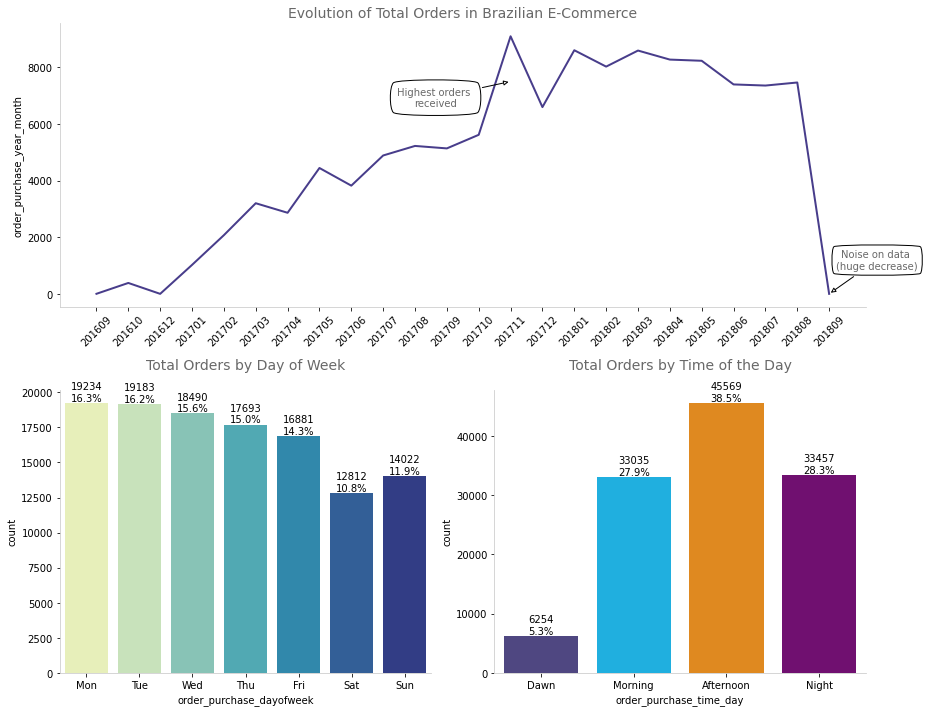

In [72]:
fig = plt.figure(constrained_layout=True, figsize=(13, 10))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# Lineplot - Evolution of e-commerce orders along time 
sns.lineplot(data=master_df['order_purchase_year_month'].value_counts().sort_index(), ax=ax1, 
             color='darkslateblue', linewidth=2)
ax1.annotate(f'Highest orders \nreceived', (13, 7500), xytext=(-75, -25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.8),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
ax1.annotate(f'Noise on data \n(huge decrease)', (23, 0), xytext=(48, 25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.5),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
format_spines(ax1, right_border=False)  
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.set_title('Evolution of Total Orders in Brazilian E-Commerce', size=14, color='dimgrey')

# Barchart - Total of orders by day of week
single_countplot(master_df, x='order_purchase_dayofweek', ax=ax2, order=False, palette='YlGnBu')
weekday_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax2.set_xticklabels(weekday_label)
ax2.set_title('Total Orders by Day of Week', size=14, color='dimgrey', pad=20)

# Barchart - Total of orders by time of the day
day_color_list = ['darkslateblue', 'deepskyblue', 'darkorange', 'purple']
single_countplot(master_df, x='order_purchase_time_day', ax=ax3, order=False, palette=day_color_list)
ax3.set_title('Total Orders by Time of the Day', size=14, color='dimgrey', pad=20)

plt.tight_layout()
plt.show()

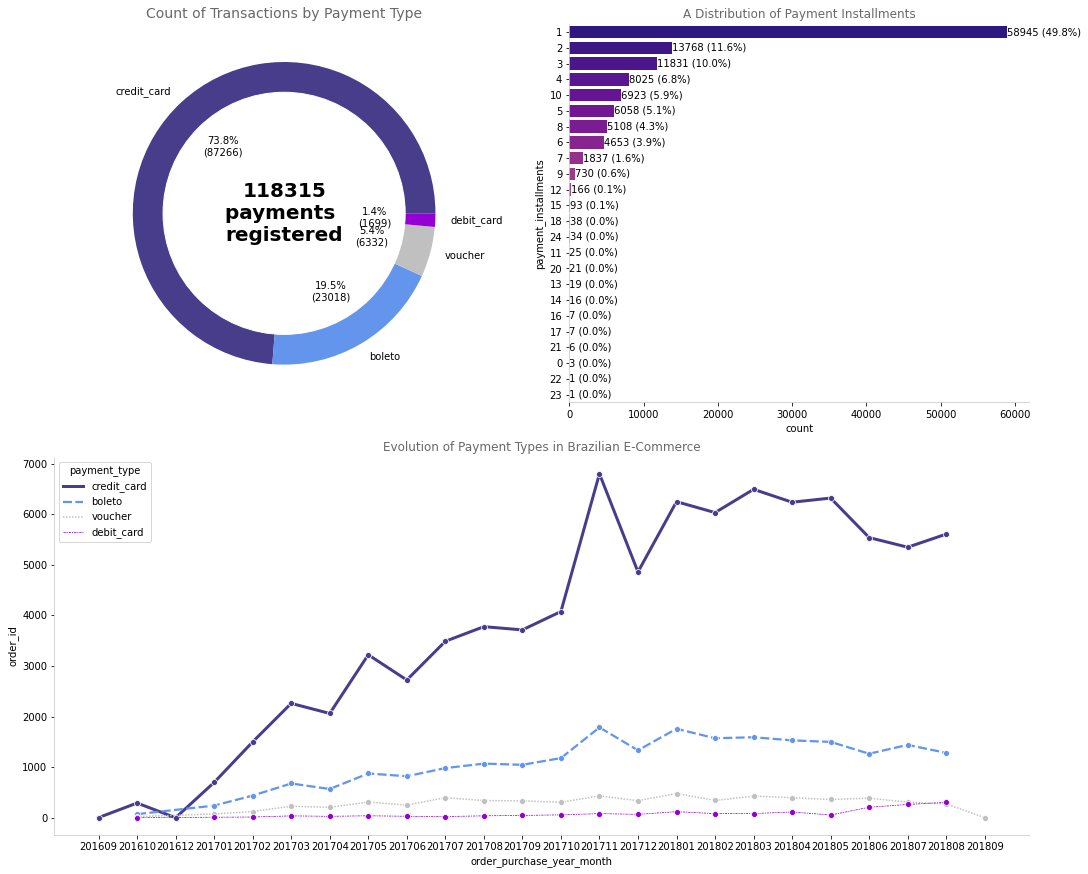

In [73]:
# Creating figure
fig = plt.figure(constrained_layout=True, figsize=(15, 12))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

# Plot 1 - Payment types in a donut chart
colors = ['darkslateblue', 'cornflowerblue', 'silver', 'darkviolet']
label_names = master_df['payment_type'].value_counts().index
donut_plot(master_df, col='payment_type', ax=ax1, label_names=label_names, colors=colors,
           title='Count of Transactions by Payment Type', text=f'{len(master_df)}\npayments \nregistered')

# Plot 2 - Payment installments
single_countplot(master_df, ax=ax2, y='payment_installments')
ax2.set_title('A Distribution of Payment Installments', color='dimgrey', size=12)

# Plot 3 - Evolution of payment types
payment_evl = master_df.groupby(by=['order_purchase_year_month', 'payment_type'], as_index=False).count()
payment_evl = payment_evl.loc[:, ['order_purchase_year_month', 'payment_type', 'order_id']]
payment_evl = payment_evl.sort_values(by=['order_purchase_year_month', 'order_id'], ascending=[True, False])
sns.lineplot(x='order_purchase_year_month', y='order_id', data=payment_evl, ax=ax3, hue='payment_type',
             style='payment_type', size='payment_type', palette=colors, marker='o')
format_spines(ax3, right_border=False)
ax3.set_title('Evolution of Payment Types in Brazilian E-Commerce', size=12, color='dimgrey')
plt.show()

In [74]:
# Grouping geolocation data for plotting a heatmap
heat_data = geolocationX.groupby(by=['geolocation_lat', 'geolocation_lng'], as_index=False).count().iloc[:, :3]

# Creating a mapa using folium
map1 = folium.Map(
    location=[-15, -50], 
    zoom_start=4.0, 
    tiles='cartodbdark_matter'
)

# Plugin: HeatMap
HeatMap(
    name='Heat Map',
    data=heat_data,
    radius=10,
    max_zoom=13
).add_to(map1)

#map1

In [75]:
master_df.shape

(118315, 49)

In [76]:
master_df = master_df.dropna(how='any')

In [77]:
master_df.shape

(118305, 49)

In [78]:
master_df.isna().sum()

order_id                         0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
product_category_nam

In [79]:
output_folder = '/Users/efkanturedi/Corteze/Python_output_folders/Ecommerce/'

#master_df.to_csv(output_folder+'master_df_clean.csv', index=False)

In [80]:
customer_unique_id_list = master_df['customer_unique_id']
customer_unique_id_list

0         708ab75d2a007f0564aedd11139c7708
1         a8b9d3a27068454b1c98cc67d4e31e6f
2         6f70c0b2f7552832ba46eb57b1c5651e
3         87695ed086ebd36f20404c82d20fca87
4         87695ed086ebd36f20404c82d20fca87
                        ...               
119143    b6027ac07fb76ebca8c97b1887865aee
119144    53b30ca78efb2b7efcd3f9e461587eb2
119145    d3c7da954a324253814096bcaf240e4e
119146    b84dc68f02f122a88d7e7bbd37b06204
119147    b1f51a4e19da3338e51fbcfabefad1bf
Name: customer_unique_id, Length: 118305, dtype: object

In [81]:
test = master_df.duplicated()

In [82]:
test_df = master_df[master_df['customer_unique_id']=='87695ed086ebd36f20404c82d20fca87']
test_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.9,17.88,c37a0e51e5df82bdb55d38ff0ffb6af3,5,None,None,2017-12-21 00:00:00,2017-12-21 21:42:31,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,Home,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,13405.0,piracicaba,SP,2017,12,Dec,201712,20171206,6,2,Wed,12,Morning
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.9,17.88,5bc7680443b4ef765fec11a8201eeb0c,5,None,None,2017-12-21 00:00:00,2017-12-22 01:10:39,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,Home,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,13405.0,piracicaba,SP,2017,12,Dec,201712,20171206,6,2,Wed,12,Morning


In [83]:
new_master_cols = [
  'customer_unique_id',
  'customer_state',
  'customer_city',
  'qty_of_products_bought',
  'most_frequent_bought_category'
  'most_frequent_seller',
  'most_frequent_time_of_the_day',
  'average_review_score',
  'most_used_payment_type',
  'turnover_from_customer',
]

In [84]:
list_test = master_df['customer_unique_id'].to_list()

def customer_id_aggregator(customer_unique_id_list:list,master_df):
  """Cette fonction va nous permettre de récupérer les donénes de notre dataframe d'origine pour avoir
  en sortie la dataframe que l'on va faire tourner avec nos algo de ML"""
  customer_id_checklist = []
  new_master_df = pd.DataFrame(columns=new_master_cols)

  for customer_id in sample(customer_unique_id_list,10000):
    if customer_id in customer_id_checklist:
      pass
    else:
      customer_id_checklist.append(customer_id)
      sub_df = master_df[master_df['customer_unique_id']== customer_id]
      new_master_df = new_master_df.append({
        'customer_unique_id': customer_id,
        'customer_state': sub_df['customer_state'].iloc[0],
        'customer_city': sub_df['customer_city'].iloc[0],
        'qty_of_products_bought':sub_df['order_item_id'].sum(),
        'most_frequent_bought_category':sub_df['product_category_name'].value_counts().index[0],
        'most_frequent_day_of_the_week':sub_df.order_purchase_time_day.value_counts().index[0],
        'most_frequent_time_of_the_day':sub_df.order_purchase_dayofweek_name.value_counts().index[0],
        'average_review_score':np.mean(sub_df['review_score']),
        'most_used_payment_type':sub_df.payment_type.value_counts().index[0],
        'turnover_from_customer':sub_df['price'].sum()
      },ignore_index=True)
  return new_master_df


In [85]:
final = customer_id_aggregator(list_test,master_df)

In [86]:
final.drop(columns=['most_frequent_bought_categorymost_frequent_seller'],inplace=True)

In [87]:
final

,customer_unique_id,customer_state,customer_city,qty_of_products_bought,most_frequent_time_of_the_day,average_review_score,most_used_payment_type,turnover_from_customer,most_frequent_bought_category,most_frequent_day_of_the_week
0,0c8dd93583b64079a749cb0874a9b73c,MG,formiga,1.0,Sun,5.0,credit_card,109.90,Sports_leisure,Afternoon
1,58f58e001ee9414b521c2dc29632f0de,MG,uberlandia,1.0,Thu,5.0,credit_card,79.99,Electronics,Afternoon
2,8a11981cadf7feaab34826f59a3185c6,ES,afonso claudio,1.0,Thu,5.0,credit_card,95.00,Electronics,Morning
3,ca49046caba6fd40df184027f34b42e3,PR,arapongas,1.0,Mon,5.0,credit_card,39.98,Auto,Morning
4,609094428132c6fdc75ab1c7e0f36b94,SP,sao paulo,1.0,Mon,4.0,credit_card,74.90,Home,Morning
...,...,...,...,...,...,...,...,...,...,...
9691,4b69463d4a30fdba7171716504935ef7,RJ,rio de janeiro,1.0,Thu,5.0,credit_card,67.89,Appliances,Morning
9692,533bb817850cf3ad1d6e1ab3adf39fb0,SP,sorocaba,1.0,Thu,3.0,credit_card,64.99,Health_beauty,Afternoon
9693,bef334a9b4cecae4dc0916d62a91dbbf,CE,fortaleza,1.0,Tue,5.0,credit_card,219.99,Other,Morning
9694,5b02d330ce52a5433874ed1dedc3b311,RS,porto alegre,3.0,Tue,4.0,credit_card,154.00,Electronics,Morning


In [88]:
final_clean = final.drop(columns=['customer_city', 'customer_state'])
final_clean.set_index('customer_unique_id')

,qty_of_products_bought,most_frequent_time_of_the_day,average_review_score,most_used_payment_type,turnover_from_customer,most_frequent_bought_category,most_frequent_day_of_the_week
customer_unique_id,,,,,,,
0c8dd93583b64079a749cb0874a9b73c,1.0,Sun,5.0,credit_card,109.90,Sports_leisure,Afternoon
58f58e001ee9414b521c2dc29632f0de,1.0,Thu,5.0,credit_card,79.99,Electronics,Afternoon
8a11981cadf7feaab34826f59a3185c6,1.0,Thu,5.0,credit_card,95.00,Electronics,Morning
ca49046caba6fd40df184027f34b42e3,1.0,Mon,5.0,credit_card,39.98,Auto,Morning
609094428132c6fdc75ab1c7e0f36b94,1.0,Mon,4.0,credit_card,74.90,Home,Morning
...,...,...,...,...,...,...,...
4b69463d4a30fdba7171716504935ef7,1.0,Thu,5.0,credit_card,67.89,Appliances,Morning
533bb817850cf3ad1d6e1ab3adf39fb0,1.0,Thu,3.0,credit_card,64.99,Health_beauty,Afternoon
bef334a9b4cecae4dc0916d62a91dbbf,1.0,Tue,5.0,credit_card,219.99,Other,Morning


In [89]:
categorical_cols = [
  'most_frequent_bought_category',
  'most_frequent_day_of_the_week',
  'most_frequent_time_of_the_day',
  'most_used_payment_type'
]

numerical_cols = [
  'qty_of_products_bought',
  'average_review_score',
  'turnover_from_customer',
]

id_s = pd.DataFrame(final_clean['customer_unique_id'])

In [90]:
id_s

,customer_unique_id
0,0c8dd93583b64079a749cb0874a9b73c
1,58f58e001ee9414b521c2dc29632f0de
2,8a11981cadf7feaab34826f59a3185c6
3,ca49046caba6fd40df184027f34b42e3
4,609094428132c6fdc75ab1c7e0f36b94
...,...
9691,4b69463d4a30fdba7171716504935ef7
9692,533bb817850cf3ad1d6e1ab3adf39fb0
9693,bef334a9b4cecae4dc0916d62a91dbbf
9694,5b02d330ce52a5433874ed1dedc3b311


In [91]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

ohe = OneHotEncoder(sparse=False)
cat = ohe.fit_transform(final[categorical_cols])
cat_df = pd.DataFrame(columns = ohe.get_feature_names(),data = cat)

In [92]:
cat_df

,x0_Appliances,x0_Arts,x0_Auto,x0_Construction,x0_Electronics,x0_Fashion,x0_Food_drinks,x0_Garden_pets,x0_Health_beauty,x0_Home,x0_Office,x0_Other,x0_Sports_leisure,x1_Afternoon,x1_Dawn,x1_Morning,x1_Night,x2_Fri,x2_Mon,x2_Sat,x2_Sun,x2_Thu,x2_Tue,x2_Wed,x3_boleto,x3_credit_card,x3_debit_card,x3_voucher
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9691,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9694,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [93]:
ss = StandardScaler()
final_clean[numerical_cols] = ss.fit_transform(final_clean[numerical_cols])

In [94]:
new_final = pd.merge(id_s,final_clean[numerical_cols],left_index=True,right_index=True)

In [95]:
new_final = pd.merge(new_final,cat_df,left_index=True, right_index=True)

In [96]:
new_final

,customer_unique_id,qty_of_products_bought,average_review_score,turnover_from_customer,x0_Appliances,x0_Arts,x0_Auto,x0_Construction,x0_Electronics,x0_Fashion,x0_Food_drinks,x0_Garden_pets,x0_Health_beauty,x0_Home,x0_Office,x0_Other,x0_Sports_leisure,x1_Afternoon,x1_Dawn,x1_Morning,x1_Night,x2_Fri,x2_Mon,x2_Sat,x2_Sun,x2_Thu,x2_Tue,x2_Wed,x3_boleto,x3_credit_card,x3_debit_card,x3_voucher
0,0c8dd93583b64079a749cb0874a9b73c,-0.231394,0.701930,-0.211205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,58f58e001ee9414b521c2dc29632f0de,-0.231394,0.701930,-0.300012,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8a11981cadf7feaab34826f59a3185c6,-0.231394,0.701930,-0.255445,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,ca49046caba6fd40df184027f34b42e3,-0.231394,0.701930,-0.418809,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,609094428132c6fdc75ab1c7e0f36b94,-0.231394,-0.023970,-0.315126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9691,4b69463d4a30fdba7171716504935ef7,-0.231394,0.701930,-0.335939,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9692,533bb817850cf3ad1d6e1ab3adf39fb0,-0.231394,-0.749871,-0.344550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9693,bef334a9b4cecae4dc0916d62a91dbbf,-0.231394,0.701930,0.115670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9694,5b02d330ce52a5433874ed1dedc3b311,0.080000,-0.023970,-0.080265,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [97]:
new_final.set_index('customer_unique_id')

,qty_of_products_bought,average_review_score,turnover_from_customer,x0_Appliances,x0_Arts,x0_Auto,x0_Construction,x0_Electronics,x0_Fashion,x0_Food_drinks,x0_Garden_pets,x0_Health_beauty,x0_Home,x0_Office,x0_Other,x0_Sports_leisure,x1_Afternoon,x1_Dawn,x1_Morning,x1_Night,x2_Fri,x2_Mon,x2_Sat,x2_Sun,x2_Thu,x2_Tue,x2_Wed,x3_boleto,x3_credit_card,x3_debit_card,x3_voucher
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0c8dd93583b64079a749cb0874a9b73c,-0.231394,0.701930,-0.211205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
58f58e001ee9414b521c2dc29632f0de,-0.231394,0.701930,-0.300012,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8a11981cadf7feaab34826f59a3185c6,-0.231394,0.701930,-0.255445,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
ca49046caba6fd40df184027f34b42e3,-0.231394,0.701930,-0.418809,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
609094428132c6fdc75ab1c7e0f36b94,-0.231394,-0.023970,-0.315126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4b69463d4a30fdba7171716504935ef7,-0.231394,0.701930,-0.335939,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
533bb817850cf3ad1d6e1ab3adf39fb0,-0.231394,-0.749871,-0.344550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
bef334a9b4cecae4dc0916d62a91dbbf,-0.231394,0.701930,0.115670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [98]:
path = '/Users/efkanturedi/Corteze/Python_output_folders/Ecommerce/'
new_final.to_csv(path+'final.csv',index=False)